Data Storytelling

  Over 200,000 accidents occured in just the five boroughs of NYC in 2018. While some car accidents are considered true   accidents' over 90% are caused by human error according to Bttlaw.com. With such a high rate of accidents considered to be caused by no external factors, would we still be able to predict the severity of an accident just by the supporting data? If so, this may support the idea that the human error fault may not be as high as commonly accepted. Items such as confusing signs, poorly lit roads, or bad drainage can all cause factors that may not be seen on the surface. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import matplotlib.image as mpimg

In [2]:
pickled_file =pd.read_pickle('C:\\Users\\User\\Motor_Collision_NYC1.pkl')
df = pickled_file.copy()
df.head()


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,MM-DD,ON HOLIDAY
0,2021-04-14,2021-07-24 05:32:00,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,0,0,0,0,0,0,Following Too Closely,4407480,04-14,False
1,2021-04-13,2021-07-24 21:35:00,BROOKLYN,11217.0,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,1,0,0,0,0,0,Unspecified,4407147,04-13,False
2,2021-04-15,2021-07-24 16:15:00,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,0,0,0,0,0,0,Pavement Slippery,4407665,04-15,True
3,2021-04-13,2021-07-24 16:00:00,BROOKLYN,11222.0,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,0,0,0,0,0,0,Following Too Closely,4407811,04-13,False
4,2021-04-12,2021-07-24 08:25:00,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,0,0,0,0,0,0,Unspecified,4406885,04-12,False


In [3]:
df['MM'] = df['MM-DD'].str.rsplit('-', n=1).str.get(0)
df['BOROUGH'] = df['BOROUGH'].fillna('unlisted')
df['Weekday'] = df['CRASH DATE'].dt.day_name()
df['Time'] = df['CRASH TIME'].dt.time
df['Time'] = df['Time'].astype(str)
df['Time'] = df['Time'].str.slice(start= 0, stop = 2)
df['Day Killed'] = df.loc[df['NUMBER OF PERSONS KILLED'] > 0].Weekday

In [4]:
df.dtypes

CRASH DATE                       datetime64[ns]
CRASH TIME                       datetime64[ns]
BOROUGH                                  object
ZIP CODE                                 object
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED                 int64
NUMBER OF PERSONS KILLED                  int64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1          category
COLLISION_ID                              int64
MM-DD                                   

<function matplotlib.pyplot.show(close=None, block=None)>

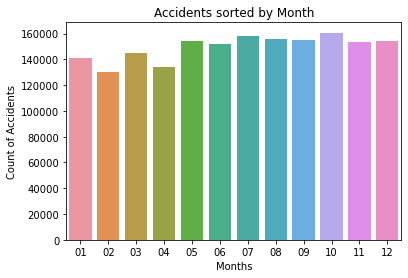

In [14]:
sns.countplot(data= df, x ='MM', order=('01','02','03','04','05','06','07','08','09','10','11','12') )
plt.xlabel('Months')
plt.ylabel('Count of Accidents')
plt.title('Accidents sorted by Month')
plt.show

From the data above we can see that our lowest counts of car accidents are in the earilier months of the year, but we also need to take into account that Febrauary is only 28 days. We see a big jump in May which makes sense as more people are going outside in the warmer months, Interestingly we see that October is the month with the most accidents.

<function matplotlib.pyplot.show(close=None, block=None)>

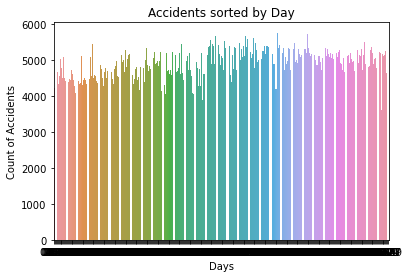

In [15]:
sns.countplot(data= df, x ='MM-DD', )
plt.xlabel('Days')
plt.ylabel('Count of Accidents')
plt.title('Accidents sorted by Day')
plt.show

In [16]:
df['MM-DD'].value_counts()

11-21    5758
09-12    5734
12-18    5671
11-15    5658
12-14    5654
         ... 
12-26    3891
07-04    3609
01-01    3537
12-25    2693
02-29    1072
Name: MM-DD, Length: 366, dtype: int64

From this data we can see which days throughout history that are extremely common for accidents and uncommon, we can see that Christmas and New Years are towards the bottom along with leap year. At the top we see months later in the year, possibly due to the people traveling or weather conditions


<function matplotlib.pyplot.show(close=None, block=None)>

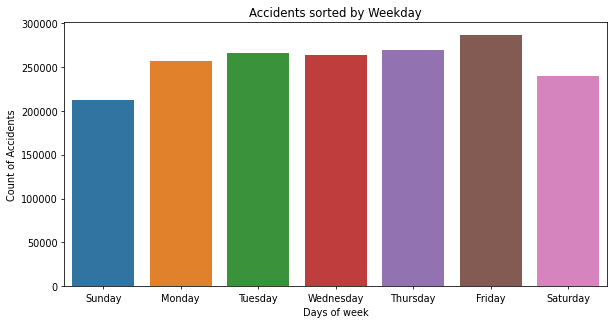

In [17]:
plt.figure(figsize = (10,5),dpi =70)
sns.countplot(data= df, x ='Weekday',order= ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday') )
plt.xlabel('Days of week')
plt.ylabel('Count of Accidents')
plt.title('Accidents sorted by Weekday')
plt.show

From this chart we can see that Friday is the most common day for accidents to occur

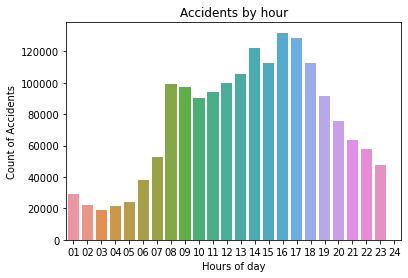

In [18]:
sns.countplot(data= df, x ='Time', order = ('01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24') )
plt.xlabel('Hours of day')
plt.ylabel('Count of Accidents')
plt.title('Accidents by hour')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

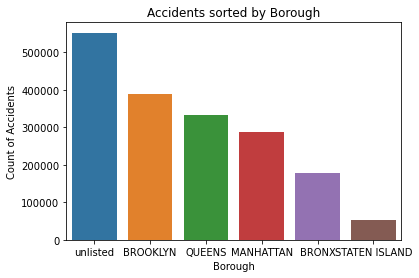

In [19]:
sns.countplot(data= df, x ='BOROUGH',order= df['BOROUGH'].value_counts().index )
plt.xlabel('Borough')
plt.ylabel('Count of Accidents')
plt.title('Accidents sorted by Borough')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

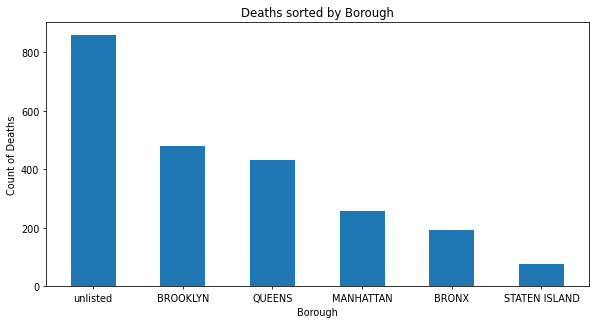

In [20]:
plt.figure(figsize = (10,5),dpi =70)
killed_b = df.groupby('BOROUGH')['NUMBER OF PERSONS KILLED'].aggregate(np.sum).sort_values(ascending= False)
plt.bar(height = killed_b, x= killed_b.index, width = .5,  )
plt.xlabel('Borough')
plt.ylabel('Count of Deaths')
plt.title('Deaths sorted by Borough')
plt.show

This provides us with a little more insight, Suprsinngly while Manhattan is the most densely populated part of NYC is only ranks third out of the five boroughs. Brooklyn leads the way with the most accidents

In [21]:
monday ={'Sunday' : df.loc[df['Weekday'] == 'Sunday']['NUMBER OF PERSONS KILLED'].aggregate(np.sum),
         'Monday' :df.loc[df['Weekday'] == 'Monday']['NUMBER OF PERSONS KILLED'].aggregate(np.sum),
     'Tuesday' :df.loc[df['Weekday'] == 'Tuesday']['NUMBER OF PERSONS KILLED'].aggregate(np.sum),
    'Wednesday' : df.loc[df['Weekday'] == 'Wednesday']['NUMBER OF PERSONS KILLED'].aggregate(np.sum),
    'Thursday' :df.loc[df['Weekday'] == 'Thursday']['NUMBER OF PERSONS KILLED'].aggregate(np.sum),
    'Friday' :df.loc[df['Weekday'] == 'Friday']['NUMBER OF PERSONS KILLED'].aggregate(np.sum),
'Saturday' :df.loc[df['Weekday'] == 'Saturday']['NUMBER OF PERSONS KILLED'].aggregate(np.sum),
}

print(monday)


{'Sunday': 348, 'Monday': 347, 'Tuesday': 313, 'Wednesday': 285, 'Thursday': 306, 'Friday': 330, 'Saturday': 370}


<function matplotlib.pyplot.show(close=None, block=None)>

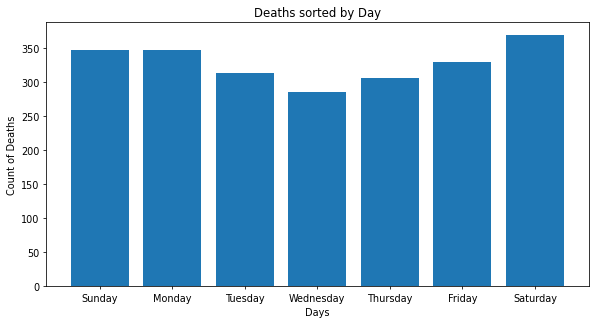

In [22]:
plt.figure(figsize = (10,5),dpi =70)
plt.bar(monday.keys(),monday.values())
plt.xlabel('Days')
plt.ylabel('Count of Deaths')
plt.title('Deaths sorted by Day')
plt.show

This provides us with a little more insight, Suprsinngly while Manhattan is the most densely populated part of NYC is only ranks third out of the five boroughs. Brooklyn leads the way with the most accidents

<function matplotlib.pyplot.show(close=None, block=None)>

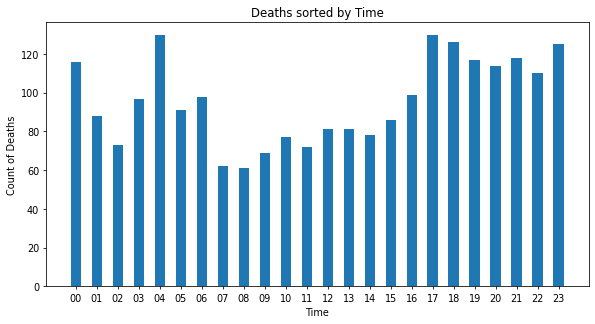

In [23]:
plt.figure(figsize = (10,5),dpi =70)
killed_d = df.groupby('Time')['NUMBER OF PERSONS KILLED'].aggregate(np.sum)
plt.bar(height = killed_d, x= killed_d.index, width = .5,  )
plt.xlabel('Time')
plt.ylabel('Count of Deaths')
plt.title('Deaths sorted by Time')
plt.show

In [24]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Unspecified                       638604
Driver Inattention/Distraction    345762
Failure to Yield Right-of-Way     103440
Following Too Closely              92736
Backing Unsafely                   68071
                                   ...  
Shoulders Defective/Improper          79
Windshield Inadequate                 71
Texting                               40
Listening/Using Headphones            20
1                                     10
Name: CONTRIBUTING FACTOR VEHICLE 1, Length: 61, dtype: int64

Unfortunately the highest ranking value on contributing factor is "Unspecified" this column may not be of much use to us when modeling the data, but it is good to note that driver inattention, not yielding, and following too closely are the top ranking categories. This helps prove that most of driver accidents are caused by human error, but doesn't help answer our question

In [25]:
df['ON HOLIDAY'].value_counts()
#from the counts we can see that 92389 accidents landed on holidays and 1700416 landed on non-holidays
print('ratio of accidents on holidays is ' + str(92389 / 1700416))
print('ratio of holidays to days in the year ' + str(22/365))
df.loc[df['ON HOLIDAY'] == True]['NUMBER OF PERSONS KILLED'].sum()
df['NUMBER OF PERSONS KILLED'].sum()
print('ratio of deaths on holidays is '+ str(129/2299))

ratio of accidents on holidays is 0.05433317494072039
ratio of holidays to days in the year 0.06027397260273973
ratio of deaths on holidays is 0.056111352762070466


Interesting enough we actually see LESS accidents on days with Holidays in proportion to total accidents

In [26]:
df['NUMBER OF PERSONS INJURED'].describe()


count    1.792805e+06
mean     2.762520e-01
std      6.710764e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.300000e+01
Name: NUMBER OF PERSONS INJURED, dtype: float64

Text(0, 0.5, 'Count')

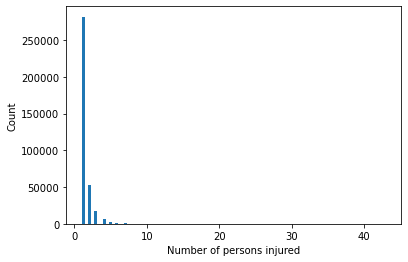

In [27]:
plt.hist(x = df.loc[df['NUMBER OF PERSONS INJURED'] != 0]['NUMBER OF PERSONS INJURED'], bins = 100)
plt.xlabel('Number of persons injured')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

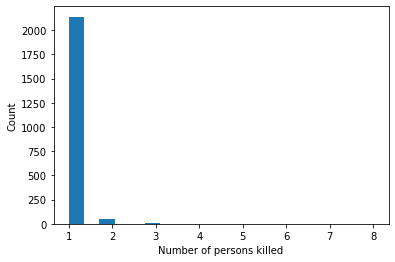

In [28]:
plt.hist(x =df.loc[df['NUMBER OF PERSONS KILLED'] != 0]['NUMBER OF PERSONS KILLED'], bins = 20)
plt.xlabel('Number of persons killed')
plt.ylabel('Count')

As we expected the data for number of persons injured and killed are both extremely right skewed as most car accidents happen without harm, therefore I removed non-harmful accidents from these plots

In [29]:
df2 = df.dropna(subset = ['LONGITUDE'])
df2 = df2[df2.LONGITUDE > -100]
df2 = df2[df2.LATITUDE > 1]

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

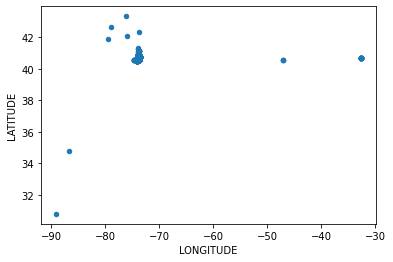

In [30]:
df2.plot(kind = 'scatter',x = 'LONGITUDE', y= 'LATITUDE')

In [31]:
df.to_csv(r'C:\Users\User\Car_Accidents.csv')